# EE 559 HW7 Summer 2020
# Ruiwen He
# SID: 1764688104

### (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs). Choose 70% of the data randomly as the training set.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import math
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from matplotlib.colors import Normalize
from sklearn.multioutput import ClassifierChain
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from numpy import interp
import seaborn as sns;
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Frogs_MFCCs.csv")
print(df.shape)
display(df)

(7195, 26)


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
x_data = df.drop(['Family','Genus','Species','RecordID'], axis = 1, inplace = False)
y_data = df[['Family','Genus','Species']]

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, train_size = 0.7, random_state = 42)

In [4]:
y_train_Family  = y_train.iloc[:, 0]
y_train_Genus   = y_train.iloc[:, 1]
y_train_Species = y_train.iloc[:, 2]

y_test_Family  = y_test['Family']
y_test_Genus   = y_test['Genus']
y_test_Species = y_test['Species']

### (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-class classiﬁcation is to train a classiﬁer for each label. We ﬁrst try this approach:

### i. Research exact match and hamming score/ loss methods for evaluating multi-label classiﬁcation and use them in evaluating the classiﬁers in this problem.


#### Hamming Score/Loss

Hamming Lose is the fraction of labels that are incorrectly predicted, i.e., the fraction of the wrong labels to the total number of labels.

#### Exact Match
Exact Match is defined as the accuracy of each example where all label relevancies must match exactly for an example to be correct.It is the most strict metric, indicating the percentage of samples that have all their labels classified correctly.

### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classiﬁers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [5]:
def SVM(X_train, X_test, y_train, y_test):
    c_param = np.logspace(-3, 6, 10, base = 10)
    gamma_param = np.linspace(0.1, 5, 20)
    parameters = dict(estimator__C = c_param, estimator__gamma = gamma_param)
    
    # Model Selecting
    model = OneVsRestClassifier(SVC(random_state = 0, kernel = 'rbf'))
    grid = GridSearchCV(model, param_grid = parameters, cv = 10, n_jobs = -1)
    grid.fit(X_train, y_train)
    bestParams = grid.best_params_
    bestScore = grid.best_score_
    
    print("The best parameters are %s with the score of %f" % (bestParams, bestScore))
    
    #refit with best parameters
    best_C = bestParams['estimator__C']
    best_gamma = bestParams['estimator__gamma']
    
    clf = SVC(C = best_C, gamma = best_gamma)
    clf.fit(X_train, y_train)
    y_test_predict = clf.predict(X_test)
    
    print("The Exact Match Ratio is", accuracy_score(y_test, y_test_predict))
    print("The Hamming Loss is", hamming_loss(y_test, y_test_predict))

In [6]:
print("Family Class: ")
SVM(X_train, X_test, y_train_Family, y_test_Family)
print("Genus Class: ")
SVM(X_train, X_test, y_train_Genus, y_test_Genus)
print("Species Class: ")
SVM(X_train, X_test, y_train_Species, y_test_Species)

Family Class: 
The best parameters are {'estimator__C': 10.0, 'estimator__gamma': 3.452631578947369} with the score of 0.993845
The Exact Match Ratio is 0.9949050486336267
The Hamming Loss is 0.005094951366373321
Genus Class: 
The best parameters are {'estimator__C': 10.0, 'estimator__gamma': 3.1947368421052635} with the score of 0.991857
The Exact Match Ratio is 0.9898100972672533
The Hamming Loss is 0.010189902732746642
Species Class: 


/Users/ruiwenhe/opt/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The best parameters are {'estimator__C': 10.0, 'estimator__gamma': 2.678947368421053} with the score of 0.991857
The Exact Match Ratio is 0.9888837424733673
The Hamming Loss is 0.0111162575266327


### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [7]:
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

In [8]:
def SVM_L1(X_train_standard, X_test_standard, y_train, y_test):
    c_param = np.logspace(-3, 6, 10, base = 10)
    parameters = dict(estimator__C = c_param)
    
    # Model Selecting
    model_penalized = OneVsRestClassifier(LinearSVC(penalty='l1', dual = False, max_iter = 5000))
    
    grid_penalized = GridSearchCV(model_penalized, param_grid = parameters, cv = 10, n_jobs = -1)
    grid_penalized.fit(X_train_standard, y_train)
    
    bestParams = grid_penalized.best_params_
    bestScore = grid_penalized.best_score_
    
    print("The best parameter is %s with the score of %f" % (bestParams, bestScore))
    
    #refit with best parameters
    best_C = bestParams['estimator__C']
    clf = LinearSVC(penalty = 'l1', dual = False, max_iter = 5000, C = best_C)
    clf.fit(X_train_standard, y_train)
    y_test_predict = clf.predict(X_test_standard)
    
    print("The Exact Match Ratio is", accuracy_score(y_test, y_test_predict))
    print("The Hamming Loss is", hamming_loss(y_test, y_test_predict))
    

In [9]:
print("Family Class: ")
SVM_L1(X_train_standard, X_test_standard, y_train_Family, y_test_Family)
print("Genus Class: ")
SVM_L1(X_train_standard, X_test_standard, y_train_Genus, y_test_Genus)
print("Species Class: ")
SVM_L1(X_train_standard, X_test_standard, y_train_Species, y_test_Species)

Family Class: 
The best parameter is {'estimator__C': 1.0} with the score of 0.940629
The Exact Match Ratio is 0.9286706808707735
The Hamming Loss is 0.07132931912922649
Genus Class: 
The best parameter is {'estimator__C': 10.0} with the score of 0.952742
The Exact Match Ratio is 0.9416396479851783
The Hamming Loss is 0.058360352014821676
Species Class: 
The best parameter is {'estimator__C': 10.0} with the score of 0.960285
The Exact Match Ratio is 0.9592403890690134
The Hamming Loss is 0.04075961093098657


### iv.	Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classiﬁers you trained.

In [10]:
sm = SMOTE(random_state = 10)

X_train_Family_SMOTE, y_train_Family_SMOTE = sm.fit_resample(X_train_standard, y_train_Family)
X_train_Genus_SMOTE, y_train_Genus_SMOTE = sm.fit_resample(X_train_standard, y_train_Genus)
X_train_Species_SMOTE, y_train_Species_SMOTE = sm.fit_resample(X_train_standard, y_train_Species)


In [11]:
def SVM_SMOTE(X_train_SMOTE, X_test_standard, y_train_SMOTE, y_test):
    c_param = np.logspace(-3, 6, 10, base = 10)
    parameters = dict(estimator__C = c_param)
    
    # Model Selecting
    model_SMOTE = OneVsRestClassifier(LinearSVC(penalty = 'l1', dual = False, max_iter = 5*1e4))
    grid_SMOTE = GridSearchCV(model_SMOTE, param_grid = parameters, cv = 10, n_jobs = -1)
    grid_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
    
    bestParams = grid_SMOTE.best_params_
    bestScore = grid_SMOTE.best_score_
    
    print("The best parameter is %s with the score of %f" % (bestParams, bestScore))
    
    # refit with best parameters
    best_C = bestParams['estimator__C']
    
    clf = LinearSVC(penalty = 'l1', dual = False, max_iter =  5*1e4, C = best_C)
    
    clf.fit(X_train_SMOTE, y_train_SMOTE)
    y_test_predict = clf.predict(X_test_standard)
    
    print("The Exact Match Ratio is", accuracy_score(y_test, y_test_predict))
    print("The Hamming Loss is", hamming_loss(y_test, y_test_predict))

In [12]:
print("Family Class: ")
SVM_SMOTE(X_train_Family_SMOTE, X_test_standard, y_train_Family_SMOTE, y_test_Family)
print("Genus Class: ")
SVM_SMOTE(X_train_Genus_SMOTE, X_test_standard, y_train_Genus_SMOTE, y_test_Genus)
print("Species Class: ")
SVM_SMOTE(X_train_Species_SMOTE, X_test_standard, y_train_Species_SMOTE, y_test_Species)

Family Class: 
The best parameter is {'estimator__C': 10.0} with the score of 0.950294
The Exact Match Ratio is 0.9106067623899954
The Hamming Loss is 0.08939323761000463
Genus Class: 


/Users/ruiwenhe/opt/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The best parameter is {'estimator__C': 100.0} with the score of 0.956581
The Exact Match Ratio is 0.904585456229736
The Hamming Loss is 0.09541454377026401
Species Class: 
The best parameter is {'estimator__C': 100.0} with the score of 0.961994
The Exact Match Ratio is 0.9629458082445577
The Hamming Loss is 0.037054191755442334


Conclusion:  
It takes much longer running time after using SMOTE. The best Parameters of C change, the scores slightly increase while the Exact Match Ratio and the Hamming Score slightly decrease for "Family" and "Genus", slightly increase for "Species".

### v. Extra Practice: Study the Classiﬁer Chain method and apply it to the above problem.

A multi-label model that arranges binary classifiers into a chain.  

Each model makes a prediction in the order specified by the chain using all of the available features provided to the model plus the predictions of models that are earlier in the chain.

In [13]:
multi_label_model = MultiLabelBinarizer()
y_train_multi_label_model = multi_label_model.fit_transform(y_train.iloc[:, 0:3].to_numpy())
y_test_multi_label_model  = multi_label_model.transform(y_test.iloc[:, 0:3].to_numpy())


In [14]:
clf = ClassifierChain(LinearSVC(max_iter = 1e4))

clf.fit(X_train, y_train_multi_label_model)
y_test_predict = clf.predict(X_test)

print("The Exact Match Ratio is",  accuracy_score(y_test_multi_label_model, y_test_predict))
print("The Hamming Loss is", hamming_loss(y_test_multi_label_model, y_test_predict))

The Exact Match Ratio is 0.9411764705882353
The Hamming Loss is 0.015179586508905638


### vi. Extra Practice: Research how confusion matrices, precision, recall, ROC, and AUC are deﬁned for multi-label classiﬁcation and compute them for the classiﬁers you trained in above.

In [15]:
multilabel_confusion_matrix(y_test_multi_label_model, y_test_predict) 

array([[[ 874,   34],
        [  31, 1220]],

       [[1925,   14],
        [  28,  192]],

       [[1108,   20],
        [   3, 1028]],

       [[1972,   25],
        [  10,  152]],

       [[1972,   25],
        [  10,  152]],

       [[2132,    0],
        [  26,    1]],

       [[1972,   25],
        [  10,  152]],

       [[2072,    3],
        [  22,   62]],

       [[2072,    3],
        [  22,   62]],

       [[1487,   49],
        [  34,  589]],

       [[1664,   27],
        [  12,  456]],

       [[2012,   12],
        [   7,  128]],

       [[1809,   17],
        [   6,  327]],

       [[ 778,   34],
        [  38, 1309]],

       [[2061,    2],
        [   9,   87]],

       [[2061,    2],
        [   9,   87]],

       [[2096,   29],
        [   9,   25]],

       [[2096,   29],
        [   9,   25]],

       [[2132,    0],
        [  26,    1]],

       [[2132,    0],
        [  26,    1]],

       [[2116,    6],
        [   6,   31]],

       [[2116,    6],
        [   

In [16]:
print(classification_report(y_test_multi_label_model, y_test_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1251
           1       0.93      0.87      0.90       220
           2       0.98      1.00      0.99      1031
           3       0.86      0.94      0.90       162
           4       0.86      0.94      0.90       162
           5       1.00      0.04      0.07        27
           6       0.86      0.94      0.90       162
           7       0.95      0.74      0.83        84
           8       0.95      0.74      0.83        84
           9       0.92      0.95      0.93       623
          10       0.94      0.97      0.96       468
          11       0.91      0.95      0.93       135
          12       0.95      0.98      0.97       333
          13       0.97      0.97      0.97      1347
          14       0.98      0.91      0.94        96
          15       0.98      0.91      0.94        96
          16       0.46      0.74      0.57        34
          17       0.46    

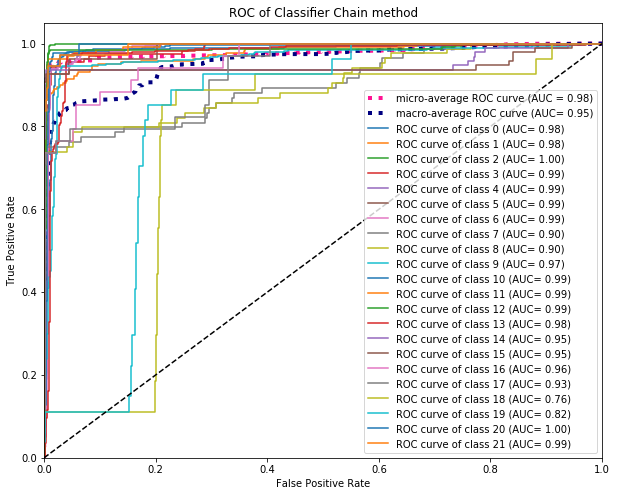

In [21]:
# Multi-label ROC/AUC Generation
n_classes = y_train_multi_label_model.shape[1]

y_score = clf.decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_multi_label_model[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) 

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_multi_label_model.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


plt.figure(figsize=(10, 8))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC= {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC= {1:0.2f})'''.format(i, roc_auc[i]))
#     print('AUC of class {0} = {1:0.2f}'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1],"k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Classiﬁer Chain method')
plt.legend()
plt.show()